# Simulation of User Preferences

In [1]:
import os
import pandas as pd
import numpy as np
from vigor import generate_graphs, nobre_predicates, predicates, compute_metrics, Predicate, VIGOR, label_graphs, learn_predicates

## Generate graphs

1. Generate graphs using the fast_gnp_random_graph function from networkx
2. Calculate statistics for each graph

In [ ]:
file_path = '../data/generated_graphs_example.csv'

if not os.path.exists(f'{file_path}.csv'):
    print('Generating graph data')
    graphs = generate_graphs(100, 2, 200, file_path=file_path)
    # graphs.to_csv(f'{file_path}.csv', index=False)
else:
    print('Loading graph data')
    graphs = pd.read_csv(f'{file_path}.csv')

Generating graph data
Generated statistics for graph 0 {'graph_type': 4, 'is_directed_int': 1, 'has_spatial_attributes': 1, 'has_temporal_attributes': 0, 'is_bipartite': 1, 'n_components': 7, 'avg_betweenness_centrality': 0.003045114590096915, 'avg_closeness_centrality': 0.6645581845465971, 'avg_eigenvector_centrality': 0.07697489581780967, 'avg_degree': 82.58333333333333, 'std_degree': 5.547202636088603, 'clustering_coefficient': 0.4929589281453882, 'transitivity': 0.49297553442049696, 'modularity': -5.5369721052036036e-05, 'communities': 2, 'avg_shortest_path_length': 1.505489021956088, 'radius': 2, 'diameter': 2, 'assortativity': 0.0028713208356793128, 'vertex_connectivity': 69, 'eccentricity_avg': 2.0, 'n_nodes': 168, 'node_types': 1, 'node_attributes': 4, 'number_of_isolates': 0, 'density': 0.4945109780439122, 'edge_types': 4, 'edge_attributes': 12, 'n_parallel_edges': 4, 'n_self_loops': 3}
Generated statistics for graph 1 {'graph_type': 2, 'is_directed_int': 1, 'has_spatial_attri

/Users/sjoerdvink/Developer/visualization-recommendation/.venv/lib/python3.11/site-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


Generated statistics for graph 2 {'graph_type': 4, 'is_directed_int': 1, 'has_spatial_attributes': 0, 'has_temporal_attributes': 1, 'is_bipartite': 0, 'n_components': 2, 'avg_betweenness_centrality': 0.006184812920838312, 'avg_closeness_centrality': 0.6044090681702811, 'avg_eigenvector_centrality': 0.09554744179643965, 'avg_degree': 36.851851851851855, 'std_degree': 4.527826353987717, 'clustering_coefficient': 0.34187520441060354, 'transitivity': 0.34111427072692635, 'modularity': -7.89121486829722e-05, 'communities': 2, 'avg_shortest_path_length': 1.6555901696088613, 'radius': 2, 'diameter': 2, 'assortativity': -0.045593148156966384, 'vertex_connectivity': 25, 'eccentricity_avg': 2.0, 'n_nodes': 108, 'node_types': 1, 'node_attributes': 15, 'number_of_isolates': 0, 'density': 0.3444098303911388, 'edge_types': 3, 'edge_attributes': 5, 'n_parallel_edges': 0, 'n_self_loops': 2}
Generated statistics for graph 3 {'graph_type': 4, 'is_directed_int': 1, 'has_spatial_attributes': 1, 'has_tempo

In [ ]:
graphs.head()

,graph_type,is_directed_int,has_spatial_attributes,has_temporal_attributes,is_bipartite,n_components,avg_betweenness_centrality,avg_closeness_centrality,avg_eigenvector_centrality,avg_degree,...,eccentricity_avg,n_nodes,node_types,node_attributes,number_of_isolates,density,edge_types,edge_attributes,n_parallel_edges,n_self_loops
0,4,1,0,1,0,2,0.006843,0.504436,0.080592,17.356164,...,3.000000,146,3,6,0,0.119698,5,2,2,5
1,4,0,0,0,0,7,0.011514,0.554609,0.114805,15.666667,...,2.736111,72,1,2,0,0.220657,4,12,0,4
2,4,1,0,1,0,9,0.034914,0.568343,0.198937,6.916667,...,2.666667,24,4,7,0,0.300725,5,15,3,1
3,4,0,0,0,1,1,0.007891,0.561783,0.097868,22.376238,...,2.356436,101,1,4,0,0.223762,4,1,0,0
4,4,0,1,1,1,5,0.004791,0.659691,0.094859,52.600000,...,2.000000,110,1,0,0,0.482569,3,0,0,4


In [ ]:
graphs = graphs[['n_nodes', 'density']]

In [ ]:
graphs

,n_nodes,density
0,146,0.119698
1,72,0.220657
2,24,0.300725
3,101,0.223762
4,110,0.482569
...,...,...
94,198,0.219402
95,59,0.461718
96,76,0.362105
97,22,0.242424


## Sample designers

We evaluate the ability of VIGOR to recover the rules that were used to represent simulated users. We design 3 versions of this simulated user: bob_informed, who follows the rules 100\% of the time; bob_semi_informed, who follows the rules 75\% of the time and chooses other visualizations randomly the other 25\% of the time; and bob_uninformed who follows the rules 50\% of the time and chooses other visualizations randomly the other 50\% of the time.

In [ ]:
informed = label_graphs(graphs, predicates, conformance=1)
semi_informed = label_graphs(graphs, predicates, conformance=0.75)
uninformed = label_graphs(graphs, predicates, conformance=0.5)

In [ ]:
informed

0     PAOHVIS
1      MATRIX
2      MATRIX
3      MATRIX
4      MATRIX
       ...   
94     MATRIX
95     MATRIX
96     MATRIX
97     MATRIX
98     MATRIX
Length: 99, dtype: object

### Learning predicates from labeled data

In [ ]:
graphs['graph_type'].value_counts()

KeyError: 'graph_type'

In [ ]:
graph_types = graphs['graph_type'].unique()
graphs['graph_type_' + pd.Series(graph_types).astype(str)] = (graphs['graph_type'].values[None] == graph_types[:,None]).astype(int).T
graphs = graphs.drop('graph_type', axis=1)

In [ ]:
learned_predicates_informed = learn_predicates(graphs, informed, 1000)
learned_predicates_semi_informed = learn_predicates(graphs, semi_informed, 1000)
learned_predicates_uninformed = learn_predicates(graphs, uninformed, 1000)

Learning predicates for PAOHVIS
[   0] loss 0.29900479316711426
[ 100] loss 0.16119548678398132
[ 200] loss 0.20938900113105774
[ 300] loss 0.2569800317287445
[ 400] loss 0.2697622776031494
[ 500] loss 0.2769840657711029
[ 600] loss 0.2837027311325073
[ 700] loss 0.28955501317977905
[ 800] loss 0.29437729716300964
[ 900] loss 0.2982994318008423
[   0] loss 4.234220027923584
[ 100] loss 0.686330258846283
[ 200] loss 0.3682303726673126
[ 300] loss 0.355122834444046
[ 400] loss 0.35116851329803467
[ 500] loss 0.34944114089012146
[ 600] loss 0.34856534004211426
[ 700] loss 0.34809765219688416
[ 800] loss 0.34785234928131104
[ 900] loss 0.34773823618888855
Learning predicates for MATRIX
[   0] loss 3.3482367992401123
[ 100] loss 0.3295271396636963
[ 200] loss 0.20664943754673004
[ 300] loss 0.2054482251405716
[ 400] loss 0.2068488448858261
[ 500] loss 0.2080514132976532
[ 600] loss 0.20891091227531433
[ 700] loss 0.20950575172901154
[ 800] loss 0.20991487801074982
[ 900] loss 0.210196286439

### Comparing learned predicates to initial predicates

#### Informed User

In [ ]:
predicates

[(<VisualizationType.NODELINK: 'NODELINK'>, 'density', 0, 0.1),
 (<VisualizationType.NODELINK: 'NODELINK'>, 'is_directed', 0.5, 1),
 (<VisualizationType.NODELINK: 'NODELINK'>, 'n_self_loops', 0, 50),
 (<VisualizationType.NODELINK: 'NODELINK'>, 'components', 1, 5),
 (<VisualizationType.NODELINK: 'NODELINK'>, 'avg_degree', 1, 3),
 (<VisualizationType.NODELINK: 'NODELINK'>,
  'clustering_coefficient',
  0.1,
  0.4),
 (<VisualizationType.NODELINK: 'NODELINK'>, 'node_types', 1, 3),
 (<VisualizationType.NODELINK: 'NODELINK'>, 'edge_types', 1, 2),
 (<VisualizationType.NODELINK: 'NODELINK'>, 'eccentricity', 0, 5),
 (<VisualizationType.MATRIX: 'MATRIX'>, 'density', 0.1, 1),
 (<VisualizationType.MATRIX: 'MATRIX'>, 'avg_degree', 10, 50),
 (<VisualizationType.MATRIX: 'MATRIX'>, 'modularity', 0.3, 0.7),
 (<VisualizationType.MATRIX: 'MATRIX'>, 'betweenness_centrality', 0.2, 0.5),
 (<VisualizationType.MATRIX: 'MATRIX'>, 'eigenvector_centrality', 0.2, 0.8),
 (<VisualizationType.MATRIX: 'MATRIX'>, 'nod

In [ ]:
learned_predicates_informed

{'PAOHVIS': ({'n_nodes': [np.float64(85.5633316040039), np.float64(145.99999999270833)], 'density': [np.float64(0.11969768327142741), np.float64(0.21894560800497254)]},
  {'density': [np.float64(0.11969768327142741), np.float64(0.22065727291400317)]}),
 'MATRIX': ({'density': [np.float64(0.1636337688839109), np.float64(0.22065727291400317)]},
  {'density': [np.float64(0.11969768327142741), np.float64(0.1720763772806499)]}),
 'NODELINK': ({'density': [np.float64(0.11969768327142741), np.float64(0.04743554641879913)]},
  {'density': [np.float64(0.11969768327142741), np.float64(0.22065727291400317)]})}

In [ ]:
evaluation_informed = compute_metrics(predicates, learned_predicates_informed)
print(evaluation_informed)

{'PAOHVIS': {'n_nodes': {'iou': 0.13430370753045426, 'deviation': 194.78166580564778, 'inclusion': 1}, 'density': {'iou': 0.47531461561409205, 'deviation': 0.044321645638199965, 'inclusion': 0}}, 'MATRIX': {'density': {'iou': 0.06335944892232474, 'deviation': 0.4214882479849539, 'inclusion': 1}}, 'NODELINK': {'density': {'iou': 0.0, 'deviation': 0.08613106842631414, 'inclusion': 1}}}


#### Semi-Informed User

In [ ]:
evaluation_semi_informed = compute_metrics(predicates, learned_predicates_semi_informed)
print(evaluation_semi_informed)

{'PAOHVIS': {'n_nodes': {'iou': 0.12583832209344253, 'deviation': 196.6863775289754, 'inclusion': 1}, 'density': {'iou': 0.47580847702467105, 'deviation': 0.04423396780109815, 'inclusion': 0}}, np.str_('NODETRIX'): {'density': {'iou': 0.23995638557648116, 'deviation': 0.15200872288470377, 'inclusion': 1}}, 'MATRIX': {'density': {'iou': 0.05365726522252571, 'deviation': 0.42585423064986344, 'inclusion': 1}}, 'NODELINK': {'density': {'iou': 0.0, 'deviation': 0.08613106842631414, 'inclusion': 1}}, np.str_('CHORD_DIAGRAM'): {'n_nodes': {'iou': 0.0, 'deviation': 168.7507162057658, 'inclusion': 0}}, np.str_('TREEMAP'): {}}


#### Unformed User

In [ ]:
evaluation_uninformed = compute_metrics(predicates, learned_predicates_uninformed)
print(evaluation_uninformed)

{np.str_('PAOHVIS'): {'n_nodes': {'iou': 0.1588965648912941, 'deviation': 189.2482728994588, 'inclusion': 1}, 'density': {'iou': 0.47054728671914364, 'deviation': 0.04517747809271528, 'inclusion': 0}}, np.str_('NODELINK'): {'density': {'iou': 0.0, 'deviation': 0.11244900162570601, 'inclusion': 0}}, 'MATRIX': {'density': {'iou': 0.0059021865976363296, 'deviation': 0.44734401603106366, 'inclusion': 1}}, np.str_('CHORD_DIAGRAM'): {'n_nodes': {'iou': 0.0, 'deviation': 109.60817622773844, 'inclusion': 0}}, np.str_('TREEMAP'): {'n_nodes': {'iou': 0.0, 'deviation': 100.5161924398641, 'inclusion': 1}}, np.str_('NODETRIX'): {'density': {'iou': 0.2242092669410939, 'deviation': 0.15515814661178123, 'inclusion': 1}}}


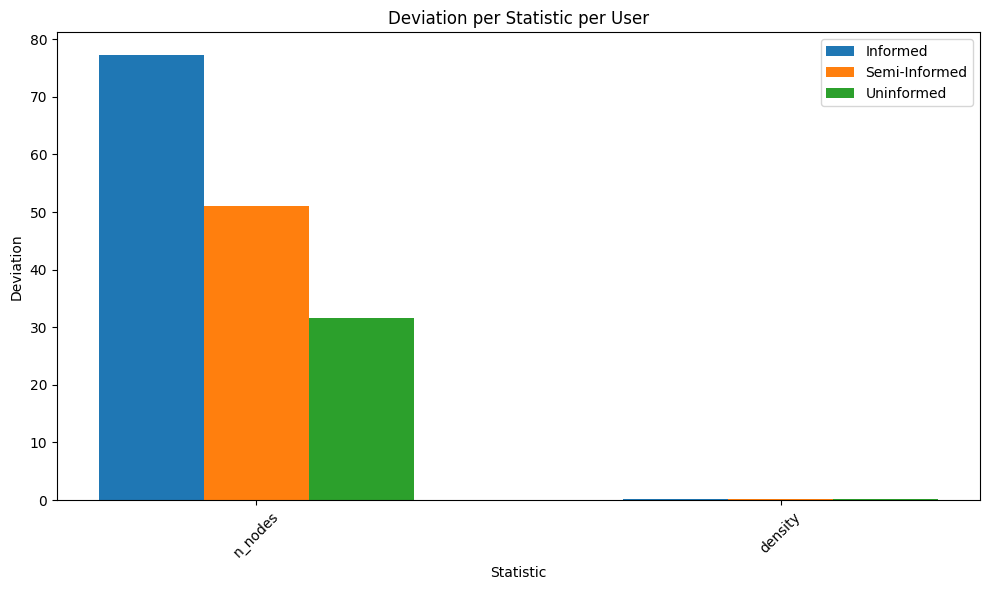

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

results = [evaluation_informed, evaluation_semi_informed, evaluation_uninformed]

# Flatten the data for plotting
def extract_deviations(results):
    deviations = defaultdict(lambda: defaultdict(list))
    for user, user_data in enumerate(results):
        for vis_type, vis_data in user_data.items():
            for stat, stat_data in vis_data.items():
                if 'deviation' in stat_data:
                    deviations[stat][vis_type].append(stat_data['deviation'])
    return deviations

deviations = extract_deviations(results)

stat_names = list(deviations.keys())
visualization_types = list(set(v for vis_dict in deviations.values() for v in vis_dict.keys()))  # All unique visualization types

# Use these custom labels instead of "User 1", "User 2", "User 3"
user_labels = ['Informed', 'Semi-Informed', 'Uninformed']

bar_width = 0.2
index = np.arange(len(stat_names))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each "user" (informed, semi-informed, uninformed)
for i, user in enumerate(user_labels):
    deviation_values = []
    for stat in stat_names:
        user_devs = []
        for vis_type in visualization_types:
            if len(deviations[stat][vis_type]) > i:
                user_devs.append(deviations[stat][vis_type][i])
            else:
                user_devs.append(0)  # Fill with 0 if the user does not have this visualization type
        deviation_values.append(np.mean(user_devs))  # Average deviation for each statistic

    ax.bar(index + i * bar_width, deviation_values, bar_width, label=user)

# Labeling the axes and the chart
ax.set_xlabel('Statistic')
ax.set_ylabel('Deviation')
ax.set_title('Deviation per Statistic per User')
ax.set_xticks(index + bar_width * (len(user_labels) - 1) / 2)
ax.set_xticklabels(stat_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()